In [1]:
#Import Libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [2]:
data_train = datasets.USPS(root='usps', train=True, download=True, transform=ToTensor())
data_test = datasets.USPS(root='usps', train=False, download=True, transform=ToTensor())

train = DataLoader(data_train, batch_size=512, shuffle=True)
test = DataLoader(data_test)

In [3]:
img, label = data_train[0]
img.shape

torch.Size([1, 16, 16])

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.a = nn.ReLU()
        self.output = nn.Linear(16, 10)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = self.pool(self.a(self.conv1(x)))
        x = self.pool(self.a(self.conv2(x)))
        x = self.flatten(x)
        x = self.output(x)
        return x

In [5]:
model = CNN().to('cuda')
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [6]:
epochs = 50
train_loss = torch.zeros(epochs)
train_acc = torch.zeros(epochs)
test_acc = torch.zeros(epochs)

for epoch in range(epochs):
    cumalative = 0
    total = 0
    for X, Y in train:
        X, Y = X.to('cuda'), Y.to('cuda')
        out = model(X)
        loss = loss_fn(out, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cumalative += (out.argmax(axis=1)==Y).sum().item()
        total += loss.item()
    train_loss[epoch] = total /len(train)
    train_acc[epoch] = cumalative/len(data_train)
    correct = 0
    with torch.no_grad():
        for Xt, Yt in test:
            Xt, Yt = Xt.to('cuda'), Yt.to('cuda')
            out_test = model(Xt)
            correct += (out_test.argmax(axis=1) == Yt).sum().item()
    test_acc[epoch] = correct / len(data_test)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss[epoch]:.4f}, "f"Train Acc: {train_acc[epoch]*100:.2f}%, Test Acc: {test_acc[epoch]*100:.2f}%")

Epoch 1/50, Loss: 2.1015, Train Acc: 24.10%, Test Acc: 40.81%
Epoch 2/50, Loss: 1.6419, Train Acc: 42.93%, Test Acc: 54.66%
Epoch 3/50, Loss: 1.0607, Train Acc: 64.24%, Test Acc: 64.42%
Epoch 4/50, Loss: 0.7890, Train Acc: 74.79%, Test Acc: 68.51%
Epoch 5/50, Loss: 0.7845, Train Acc: 73.79%, Test Acc: 70.00%
Epoch 6/50, Loss: 0.6231, Train Acc: 79.37%, Test Acc: 75.29%
Epoch 7/50, Loss: 0.5376, Train Acc: 82.54%, Test Acc: 78.82%
Epoch 8/50, Loss: 0.5443, Train Acc: 81.54%, Test Acc: 81.76%
Epoch 9/50, Loss: 0.4414, Train Acc: 85.98%, Test Acc: 76.33%
Epoch 10/50, Loss: 0.4174, Train Acc: 86.52%, Test Acc: 79.07%
Epoch 11/50, Loss: 0.4227, Train Acc: 87.09%, Test Acc: 81.91%
Epoch 12/50, Loss: 0.3694, Train Acc: 88.34%, Test Acc: 84.45%
Epoch 13/50, Loss: 0.3043, Train Acc: 90.91%, Test Acc: 83.91%
Epoch 14/50, Loss: 0.3025, Train Acc: 91.13%, Test Acc: 81.07%
Epoch 15/50, Loss: 0.6125, Train Acc: 80.19%, Test Acc: 86.15%
Epoch 16/50, Loss: 0.2853, Train Acc: 91.70%, Test Acc: 86.25%
E

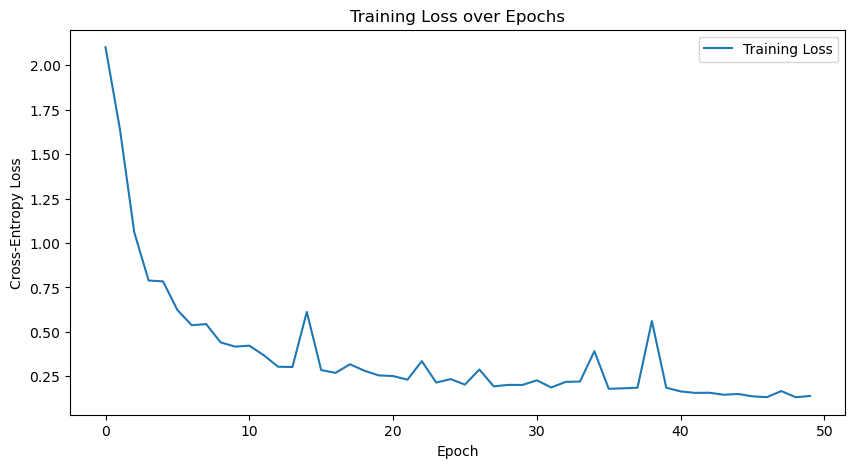

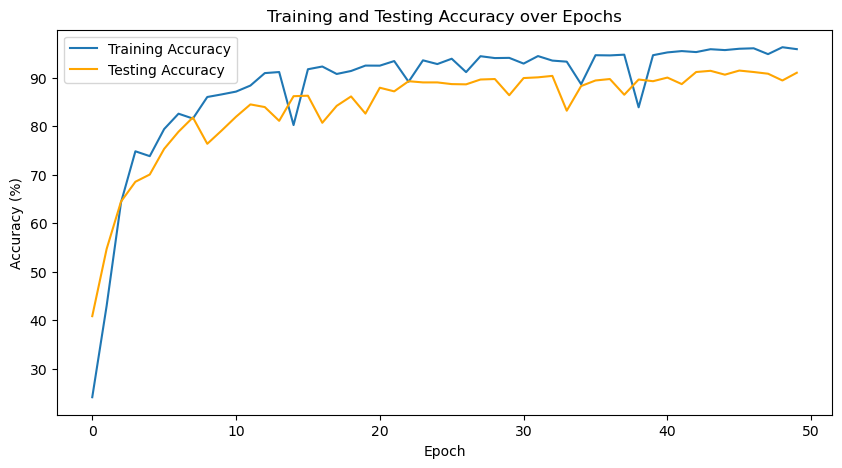

In [7]:
# Plot Cross-Entropy Loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plot Training and Testing Accuracy on the same graph
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_acc * 100, label='Training Accuracy')
plt.plot(range(epochs), test_acc * 100, label='Testing Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()
